<a href="https://colab.research.google.com/github/zenobia29/class2021Fall/blob/main/211117.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** 내용 중에서 제가 함부로 규정하기 애매한 단어들에 대해서는 "~(?)" 하는 식으로 표기를 해 두었습니다. 맥락 상 우선 명시는 해 두어야 하나, 정확히 뭐라고 불러야 하는지가 헷갈리는 경우 표시해 둔 것이니 초보자의 미숙함으로 너그러이 이해해 주시면 감사하겠습니다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

앞선 코드는 순서대로 Numpy, Matplotlib.pylpot, IPython.display 를 설치하기 위한 명령어입니다

In [ ]:
# parameter setting
amp = 1          # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz
dur = 0.5        # in seconds
freq = 100.0     # sine frequency, Hz
phase = np.pi/2  # phase, radian

파라미터 세팅값에 대한 전제입니다.

진폭 = 1 (범위는 0부터 1까지), sampling rate(1초에 점을 몇 개나 찍을 것인가) = 10000 (단위는 Hz), 듀레이션(duration, 시간) = 0.5 (단위는 초), 진동수(frequency) = 100 (사인함수에 기초하며, 단위는 Hz), phase = np.pi(π)/2 (2분의 π이며, 단위는 radian입니다)

In [ ]:
# generate time
nSamp = sr * dur
t = np.arange(1, nSamp+1)/sr

샘플을 Sampling rate * duration 으로 잡았을 때, 시간(t)는 1부터 nSamp+1 까지의 넘파이 어레이를 시킨 값을 Sampling rate 로 나눈 것이 됩니다.

Sampling rate 는 1초에 몇 개의 점을 찍을지에 대한 영역이니, sr = n 의 경우 1초에 n개의 점을 찍게 됩니다. (본 코딩에서는 sr=10000으로 parameter setting을 통해 이미 지정한 바 있습니다.)

sr=N 인 상황에서, 첫 번째 찍힌 점은 1/N초에 찍힌 점이 됩니다. m 번째 찍힌 점은, m/N 초에 찍힌 점이 됩니다. 본 코딩의 parameter setting에 의거하여 예를 들면, 100 번째 찍힌 점은 100/10000 초, 즉 1/100 초에 찍힌 점이 됩니다. 

우리가 알아내야 할 것은 '번째'에 따라 유추된 '시간'이므로, '번째'를 어레이 시킨 값을 sampling rate로 나누었을 때에 시간이 나오게 됩니다.

In [ ]:
# generate phase
theta = t * 2*np.pi * freq + phase

radian 계산 시 2π=360도 라는 전제를 염두에 두고 계산을 시작해야 합니다.

1Hz의 진동수를 가지는 파동(?)은, 1초에 1번 진동하는 것이며, 다시 말해 1초에 1번 회전하니 360도를 전부 채우게 되고, 고로 이를 radian 값으로 옮겨 보면 2π가 됩니다.

f Hz 의 진동수를 가지는 파동(?)은, t 초에 f*t 번 진동하고, t초에 ft 번 회전하는 것이니 radian 값으로 옮겨 보면 2πft 가 됩니다.

이렇게 도출된 radian 값에 초기 phase (np.pi/2) 를 더해 주면 현재 phase 를 구할 수 있습니다.

In [ ]:
# generate signal by cosine-phasor
s = amp * np.sin(theta)

본 parameter setting의 phase 값이 np.pi(π)/2 라는 점에서 유추할 수 있듯이, parameter setting에 의한 함수(?)는 코사인함수 입니다. 그렇기에 "cosine-phasor"를 활용해 만들어진 signal을 관찰하게 됩니다.

signal은 sin(theta), 다시 말해 sin(t * 2*np.pi * freq + phase) 값으로 도출됩니다. 2*np.pi = 2π, freq = f, t = t 로 단순화시킨다면 sin(2πft)로 쓸 수 있고, 2πft(특정 지점의 theta값)에 sin함수를 씌운 것이 바로 signal이 됩니다.

다만, 각 파동의 진폭은 파동의 성질에 따라 다른 부분이기에, 도출된 값에 진폭을 곱해 주어야 궁극적인 signal 값을 구할 수 있습니다. 본 parameter setting에 의하면 amplitude가 1로 설정되어 있으므로, signal 값이 초기 도출값과 동일합니다.

Text(0, 0.5, 'real')

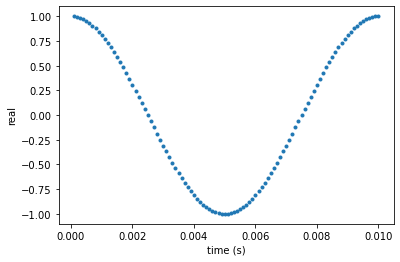

In [ ]:
plt.plot(t[0:100], s[0:100], '.')
plt.xlabel('time (s)')
plt.ylabel('real')

이에, 본 그래프는 이 파동(?)의 '한 주기'만을 살피기 위해 제작한 것으로, x축은 'time(s)'(시간(초)), y축은 'real'(=시그널 값) 으로 라벨링 되어 있습니다. 

x축과 y축 범위는 모두 "0부터 100까지"로 지정되어 있는데, 이는 현 paramter setting을 고려한 한 주기 지정값입니다.

본 parameter setting에 의하면 sampling rate는 10000이고, 이는 1초에 10000번의 점을 찍겠다는 것을 의미합니다. 다만, duration이 0.5초로 설정되어 있기에 우리는 총 5000번의 점이 찍힌 파동을 관찰하게 됩니다.

이를 어레이 시킨 것은 총 5001개의 방(?)을 만들게 됩니다. (0부터 5000까지를 아우르기에)

본 parameter setting이 제시한 파동의 진동수가 100이기에, 이 파동은 1초에 100번 진동하는 파동이 됩니다. 1초에 100번 진동한다면, 0.5초 동안에는 50번 진동하게 됩니다.

고로, 0.5초 간 50번의 주기가 반복되며, 이를 5000개의 점을 통해 관찰할 예정입니다.

그렇기에, 0부터 100번째까지의 점을 보아야 첫 번째 주기만을 떼어내어 관찰할 수 있는 것입니다. (점이 5000개, 이를 1/50 해야 하는 것이니)

이것을 time이 0.01초까지만 지정되어 있는 것을 통해 재확인할 수 있습니다.

Text(0, 0.5, 'real')

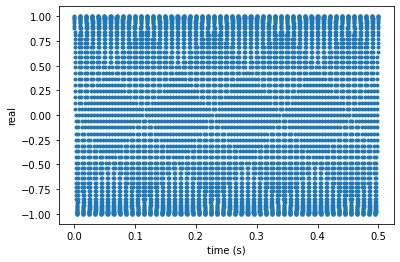

In [ ]:
plt.plot(t, s, '.')
plt.xlabel('time (s)')
plt.ylabel('real')

이 함수는 본 parameter setting이 제시하는 전 범위를 전부 나타냅니다.

In [ ]:
ipd.Audio(s, rate=sr)

그리고 이것을 ipd.Audio 입력값을 사용해 소리로 추출하면, 다음과 같은 소리가 나옵니다.

In [ ]:
def phasor_sine(amp, sr, dur, freq, phase):

  t = np.arange(1, sr * dur+1)/sr
  theta = t * 2*np.pi * freq + phase
  s = amp * np.sin(theta)

  return s, t, theta

앞선 입력어를 phasor_sine 이라는 함수로 정리하여, amp(진폭), sr(sampling rate), dur(duration, 시간), freq(진동수), phase(페이즈) 를 지정하면 s(signal), t(time), theta 가 도출되는 함수가 되었습니다.

In [ ]:
amp = 1; sr = 10000; dur = 1; freq = 440; phase = 0
s, t, theta = phasor_sine(amp, sr, dur, freq, phase)
ipd.Audio(s, rate=sr)

이에, 진폭 1, sampling rate 10000, 시간 1초, 진동수 440, phase 0 에 해당하는 소리는 진동수 440의 결과에 따라 1초 동안 재생되는 국제표준음 라(A) 사운드가 되었습니다.

In [ ]:
amp = 1; sr = 10000; dur = 1; freq = 880; phase = 0
s, t, theta = phasor_sine(amp, sr, dur, freq, phase)
ipd.Audio(s, rate=sr)

앞선 소리와 같은 명령어를 입력하되 진동수만 880으로 두 배를 한 결과, 국제표준음 라(A)보다 한 옥타브 높은 라(A) 사운드가 도출되었습니다.